# import

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


In [3]:
path = r'/Users/rabito/Desktop/Rabito Docs/Documents/Career Foundry/Achievement 6/Project'

In [4]:
df = pd.read_csv(os.path.join(path,'Homelessness Data','Prepared Data', 'Work_2.csv'),index_col=0)

# work

In [6]:
df.head()

,Sum Ind Date
Date,
5/1/17,46505
6/1/17,46285
7/1/17,46074
8/1/17,46288
9/1/17,46288


In [7]:
df.tail()

,Sum Ind Date
Date,
3/1/22,31461
4/1/22,31461
5/1/22,31269
6/1/22,31308
7/1/22,31807


In [8]:
df.describe()

,Sum Ind Date
count,63.000000
mean,41102.539683
std,5280.620247
min,31269.000000
25%,34713.000000
50%,44329.000000
75%,45299.000000
max,46505.000000


In [9]:
df.shape

(63, 1)

In [10]:
df.isnull().sum() 

Sum Ind Date    0
dtype: int64

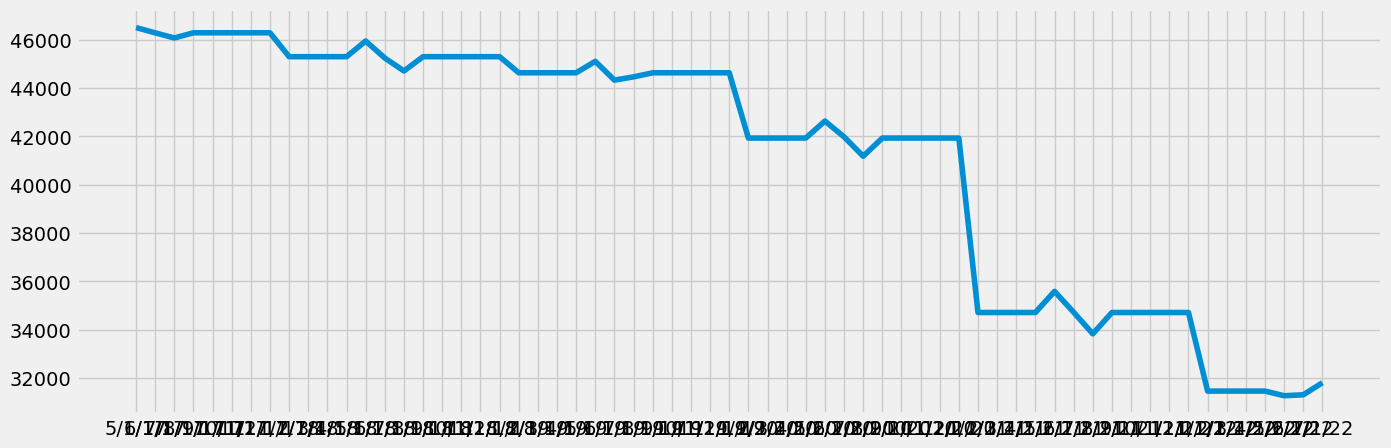

In [11]:
plt.figure(figsize=(15,5), dpi=100) of plots.
plt.plot(df)

In [12]:
data_sub = df.reset_index()

In [13]:
data_sub.head()

,Date,Sum Ind Date
0,5/1/17,46505
1,6/1/17,46285
2,7/1/17,46074
3,8/1/17,46288
4,9/1/17,46288


In [14]:
data_sub.tail()

,Date,Sum Ind Date
58,3/1/22,31461
59,4/1/22,31461
60,5/1/22,31269
61,6/1/22,31308
62,7/1/22,31807


In [15]:
data_sub.isnull().sum() 

Date            0
Sum Ind Date    0
dtype: int64

In [16]:
data_sub.shape

(63, 2)

In [17]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis=1, inplace=True)
data_sub.head()

,Sum Ind Date
datetime,
2017-05-01,46505
2017-06-01,46285
2017-07-01,46074
2017-08-01,46288
2017-09-01,46288


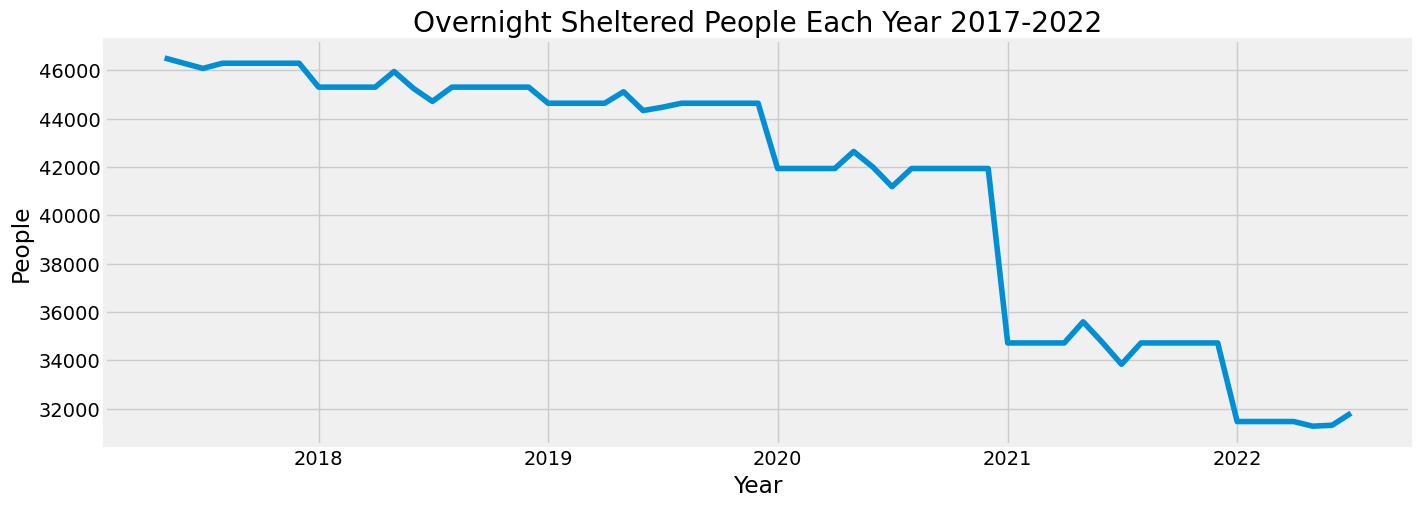

In [65]:
line_1 = plt.figure(figsize=(15,5), dpi=100)
plt.xlabel('Year')
plt.ylabel('People')
plt.title('Overnight Sheltered People Each Year 2017-2022')
line_1.patch.set_alpha(0.0)
plt.plot(data_sub)

In [19]:
data_sub.isnull().sum() 

Sum Ind Date    0
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()


39

In [21]:
data_sub.shape

(63, 1)

In [22]:
data_sub.value_counts

<bound method DataFrame.value_counts of             Sum Ind Date
datetime                
2017-05-01         46505
2017-06-01         46285
2017-07-01         46074
2017-08-01         46288
2017-09-01         46288
...                  ...
2022-03-01         31461
2022-04-01         31461
2022-05-01         31269
2022-06-01         31308
2022-07-01         31807

[63 rows x 1 columns]>

In [23]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=12)

In [24]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

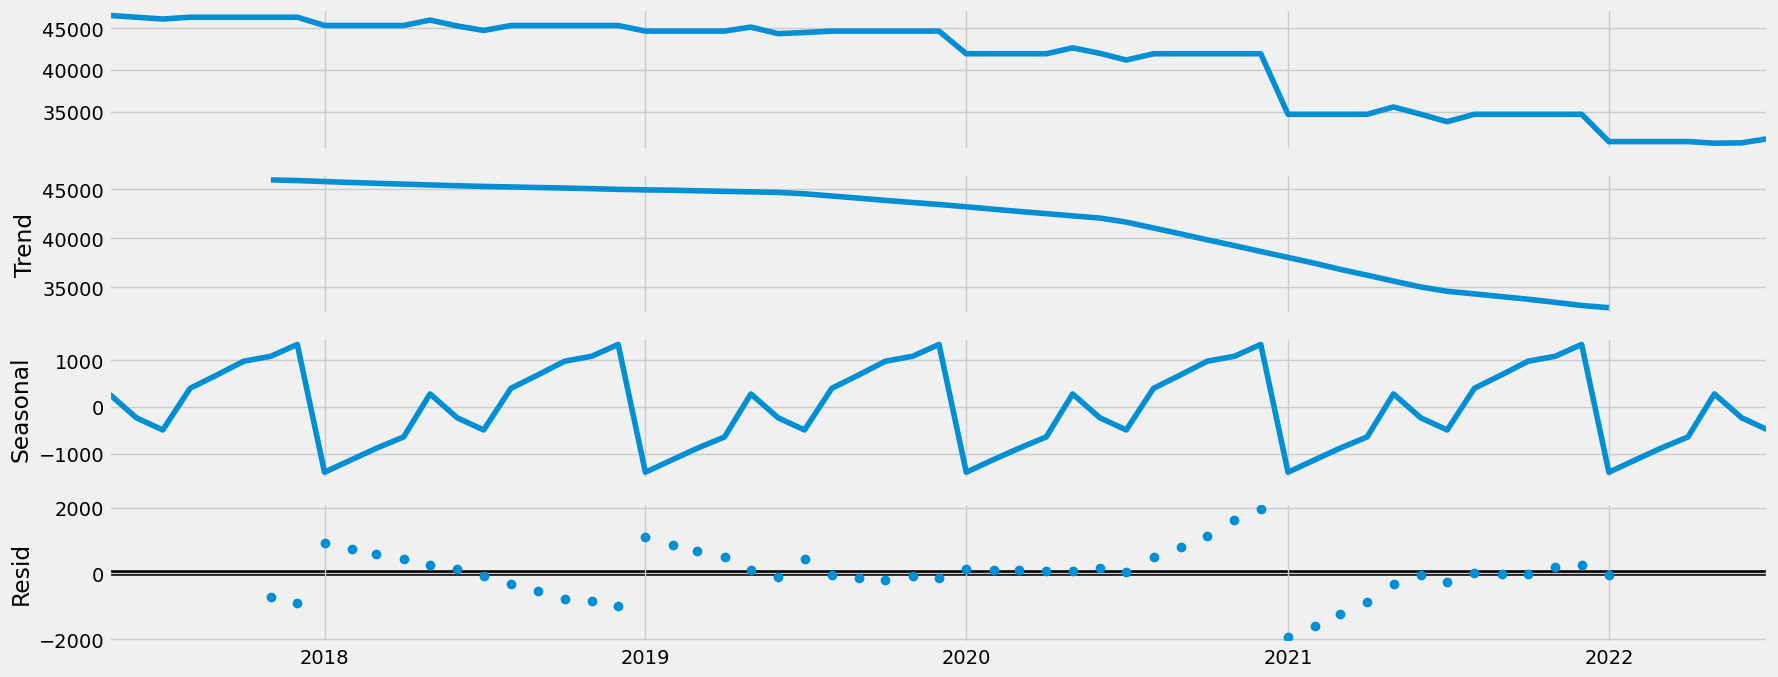

In [53]:
line_2 = decomposition.plot()
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

    dickey_fuller(data_sub['Sum Ind Date'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.195809
p-value                         0.939019
Number of Lags Used             0.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


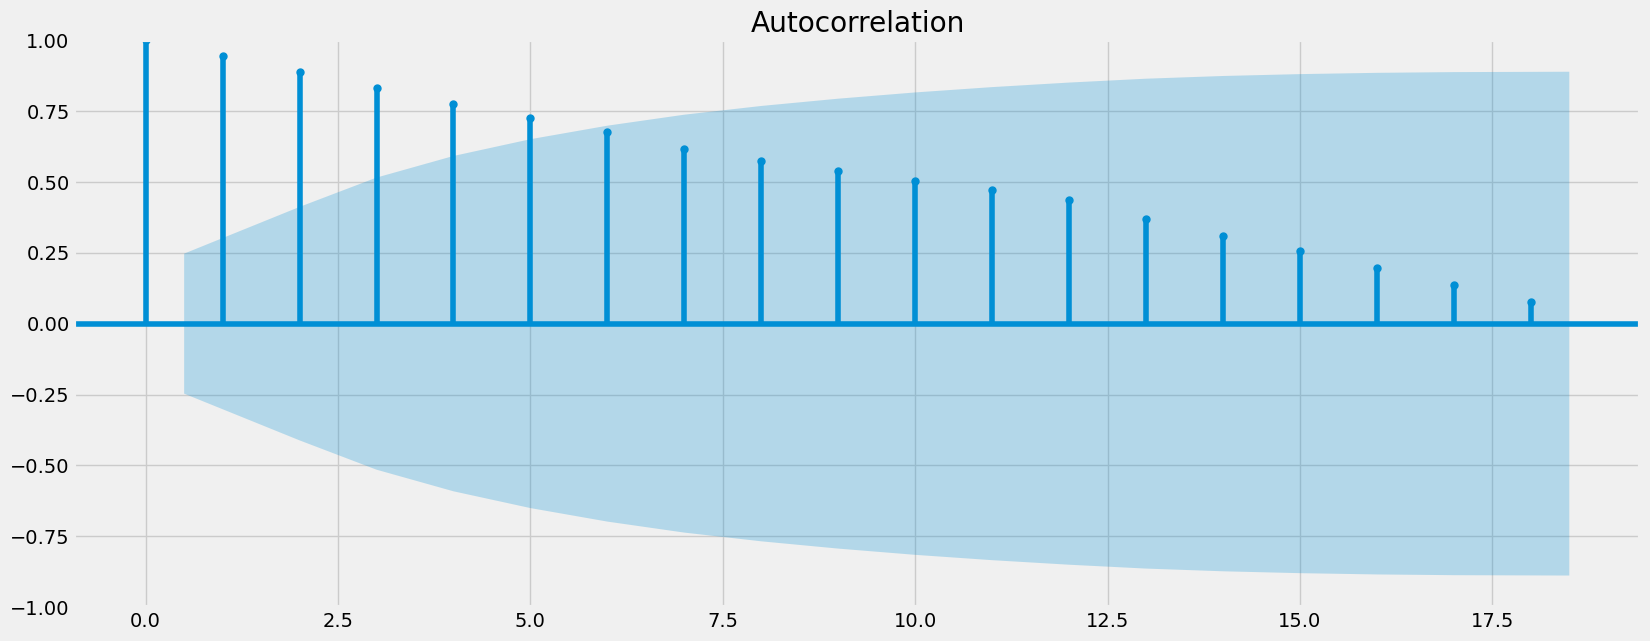

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [29]:
data_diff = data_sub - data_sub.shift(1)

In [30]:
data_diff.dropna(inplace = True)


In [31]:
data_diff.head()

,Sum Ind Date
datetime,
2017-06-01,-220.0
2017-07-01,-211.0
2017-08-01,214.0
2017-09-01,0.0
2017-10-01,0.0


In [32]:
data_diff.columns

Index(['Sum Ind Date'], dtype='object')

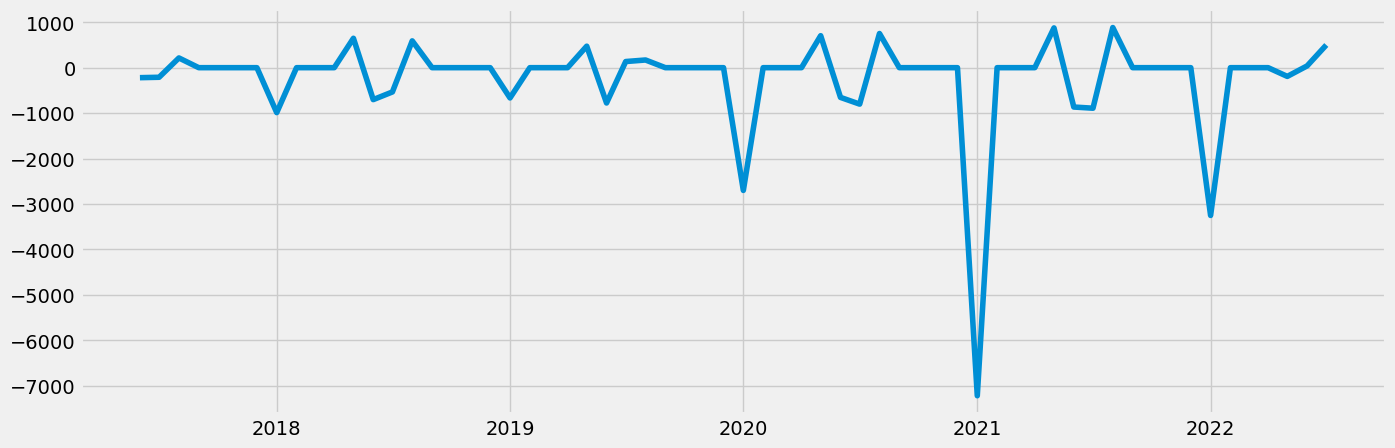

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.421017
p-value                         0.572160
Number of Lags Used            11.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


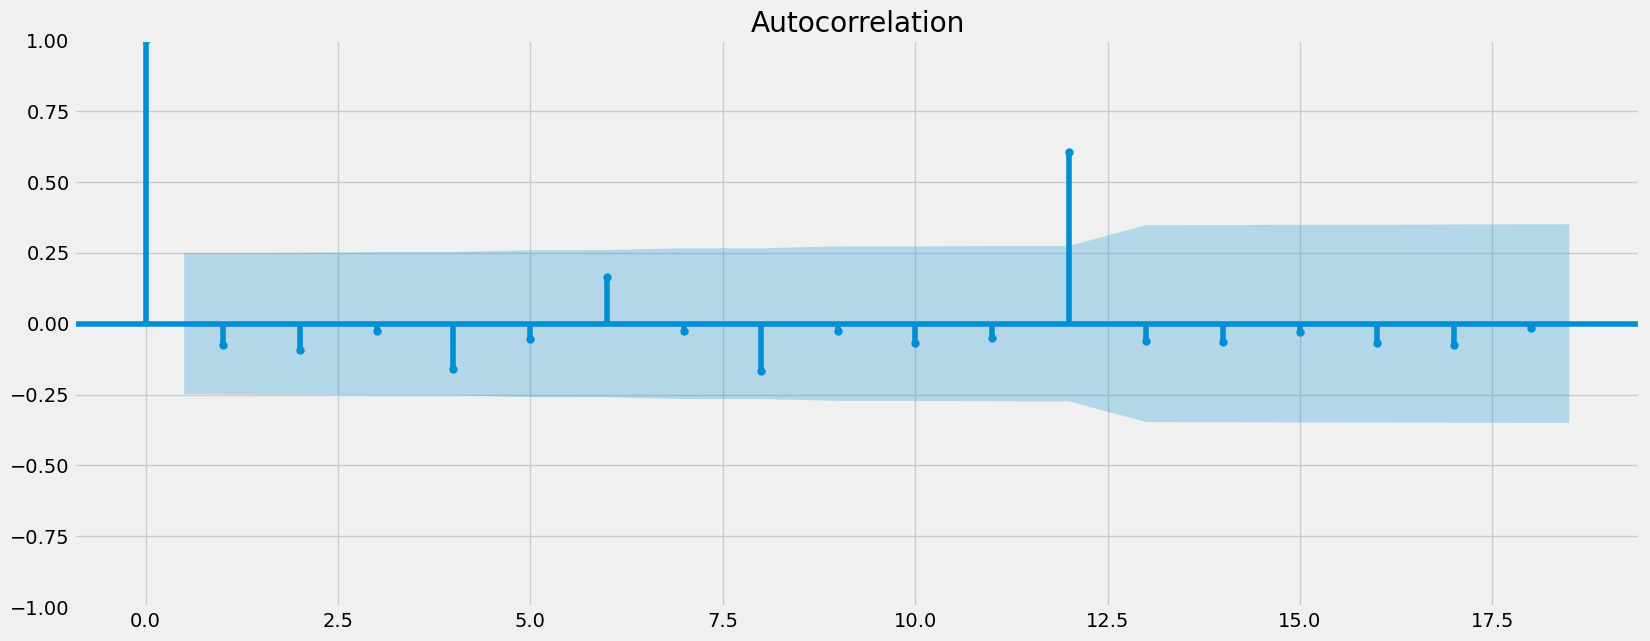

In [35]:
plot_acf(data_diff)
plt.show()

In [ ]:
# export

In [36]:
df.to_csv(os.path.join(path,'Homelessness Data','Prepared Data', 'Work_2.csv'))

In [67]:
line_1.figure.savefig(os.path.join(path,'Homelessness Data','Visualizations', 'trend_homelessness.png'))
line_2.figure.savefig(os.path.join(path,'Homelessness Data','Visualizations', 'trend_homelessness_many.png'))